In [99]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import pycoco as pcc
import pyCoCo as pccsim
from astropy.table import vstack

fltPath = pcc.utils.b(pcc.defaults._default_filter_dir_path)
rootPath = pcc.utils.b(pcc.defaults._default_coco_dir_path)
coco = pccsim.pyCoCo(fltPath, rootPath)

### Setup and diplay SN info

In [6]:
info = pcc.classes.InfoClass()
info.load()

df = pd.DataFrame({'snname': info.snname, 
                   'model': 'Bazin09', 
                   'rerun_lc': True, 
                   'rerun_spec': True})

In [32]:
for index, row in df.iterrows():
    print(row['snname'], row['model'], row['rerun_lc'], row['rerun_spec'])

SN1993J Firth17Complex False False
SN1994I Karpenka12 False False
SN1996cb Karpenka12 False False
SN1998bw Karpenka12 False False
SN2002ap Karpenka12 False False
SN2003jd Karpenka12 False False
SN2005bf Karpenka12 False False
SN2005hg Bazin09 False False
SN2006aj Bazin09 False False
SN2007Y Karpenka12 False False
SN2007gr Karpenka12 False False
SN2007uy Karpenka12 False False
SN2008D Bazin09 False False
SN2008ax Karpenka12 False False
SN2008bo Karpenka12 False False
SN2009bb Karpenka12 False False
SN2009iz Bazin09 False False
SN2009jf Karpenka12 False False
SN2010al Bazin09 False False
SN2011bm Bazin09 False False
SN2011dh Karpenka12 False False
SN2011ei Bazin09 False False
SN2012ap Bazin09 False False
iPTF13bvn Kessler10 True False


### Plot SN light curves for examination

SN1993J


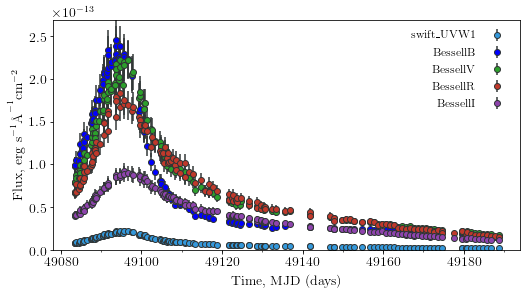

SN1994I


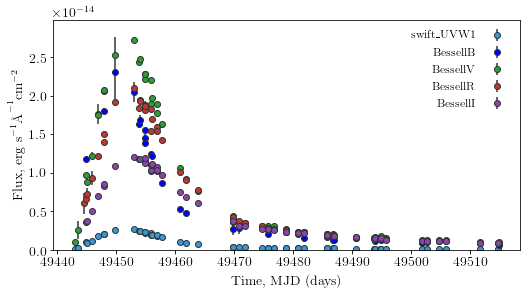

SN1996cb


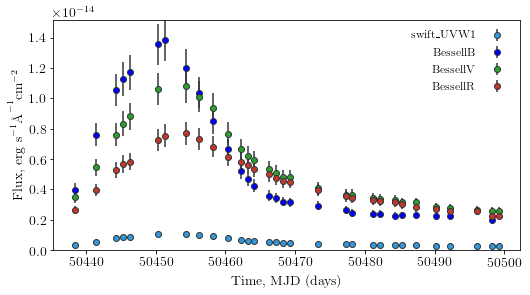

SN1998bw


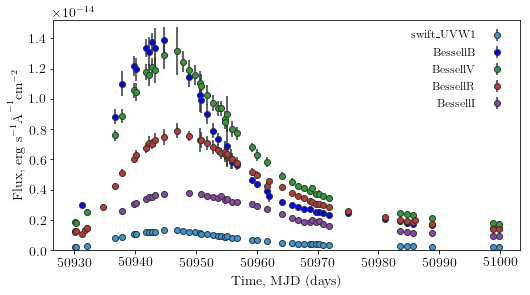

SN2002ap


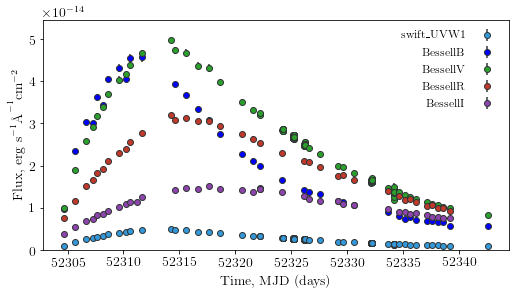

SN2003jd


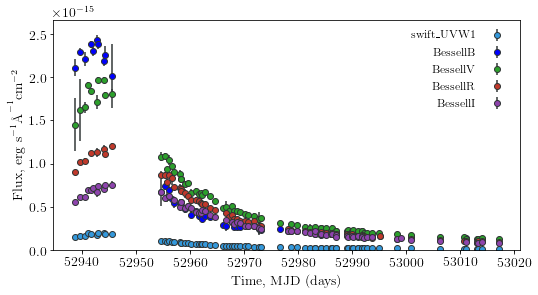

SN2005bf


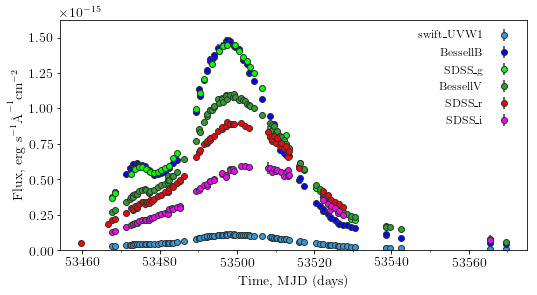

SN2005hg


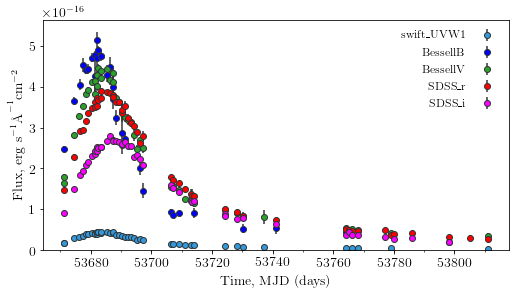

SN2006aj


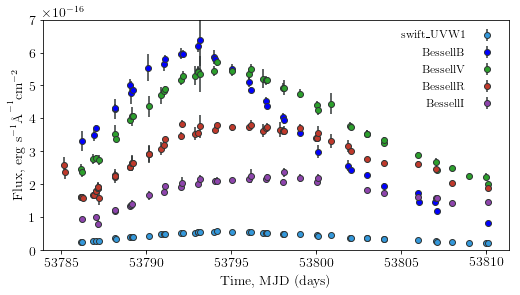

SN2007Y


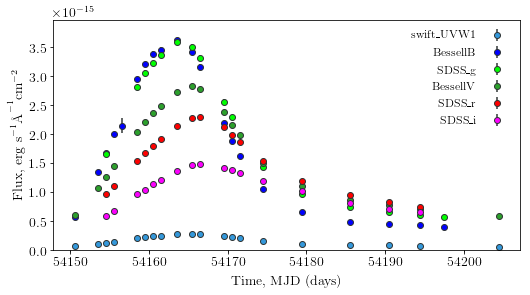

SN2007gr


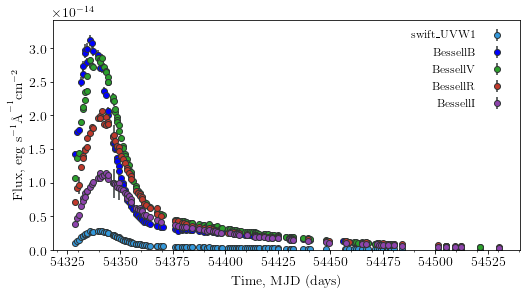

SN2007uy


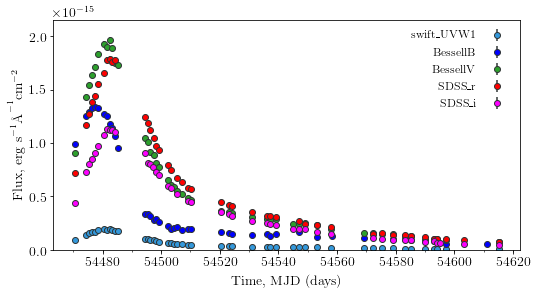

SN2008D


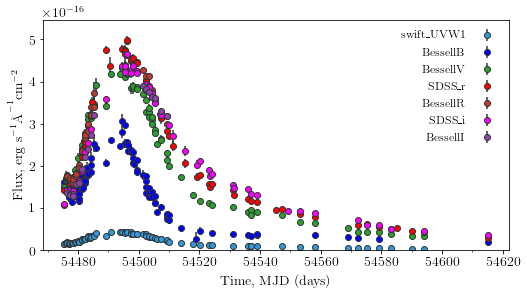

SN2008ax


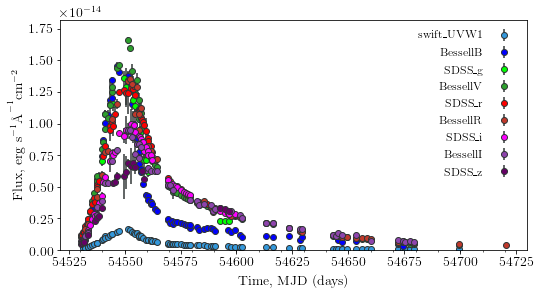

SN2008bo


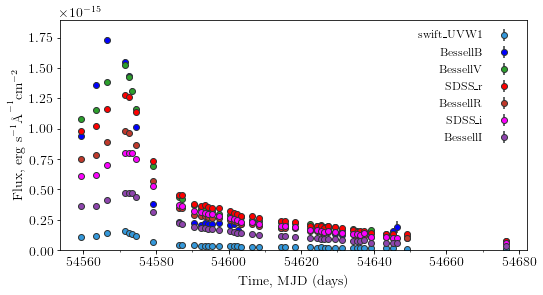

SN2009bb


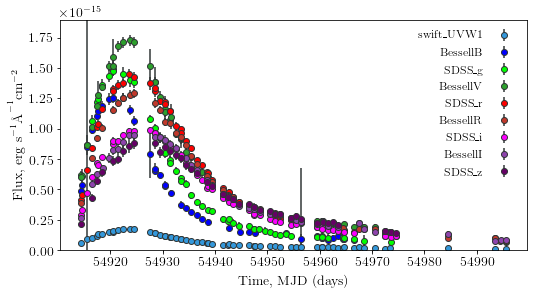

SN2009iz


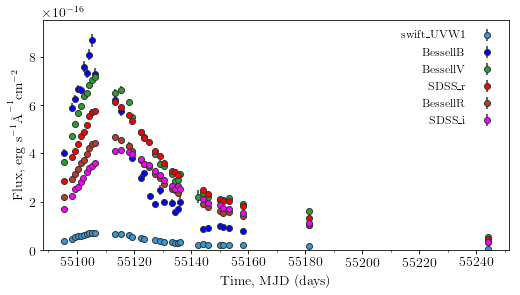

SN2009jf


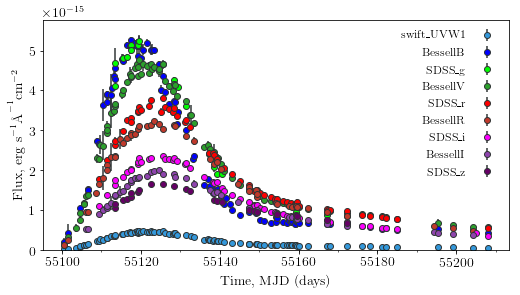

SN2010al


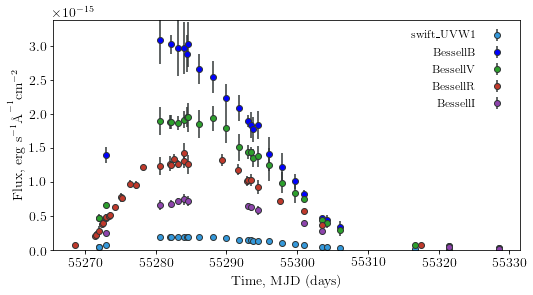

SN2011bm


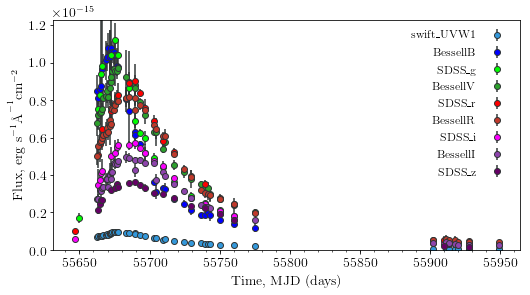

SN2011dh


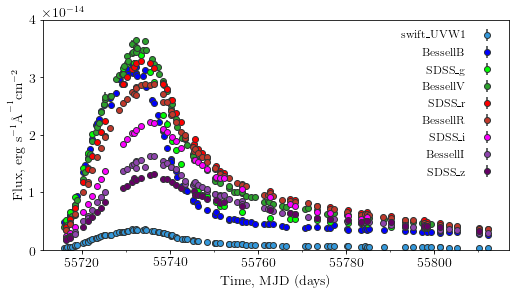

SN2011ei


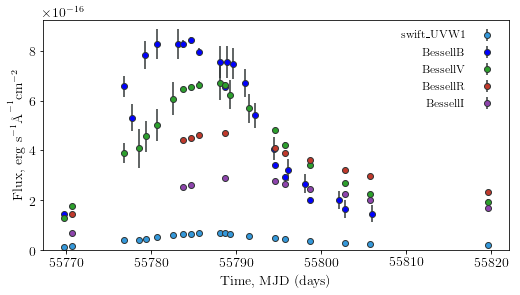

SN2012ap


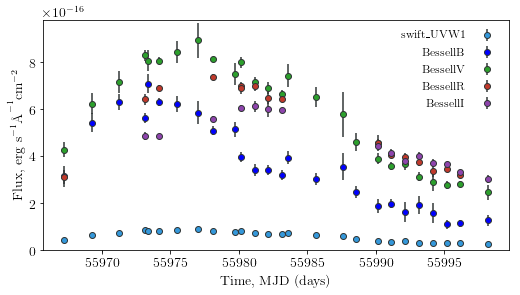

iPTF13bvn


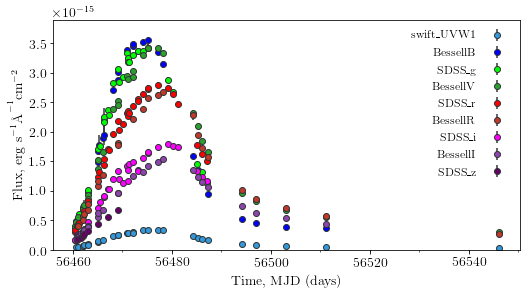

In [61]:
for index, row in df.iterrows():
    print(row['snname'])
    
    sn = pcc.classes.SNClass(row['snname'])
    sn.load_phot(verbose=False)

    sn.plot_lc(multiplot=False)

### Select light curve models 

In [33]:
BazinSN = ['SN1999dn', 'SN2005jf', 'SN2006aj', 'SN2008D', 'SN2010al', 'SN2011bm', 
           'SN2012ap', 'SN2005hg', 'SN2009iz', 'SN2011ei']
df.loc[np.isin(df['snname'], BazinSN), ['model', 'rerun_lc']] = ['Bazin09', False]

FirthSN = ['SN1993J', 'SN2011fu']
df.loc[np.isin(df['snname'], FirthSN), ['model', 'rerun_lc']] = ['Firth17Complex', False]

KesslerSN = ['iPTF13bvn']
df.loc[np.isin(df['snname'], KesslerSN), ['model', 'rerun_lc']] = ['Kessler10', False]

KarpenkaSN = ['SN1994I', 'SN1996cb', 'SN1998bw', 'SN2002ap', 'SN2003jd', 'SN2004aw',
           'SN2005bf', 'SN2007Y', 'SN2007gr', 'SN2007uy', 'SN2008ax', 'SN2008bo',
           'SN2009bb', 'SN2009er', 'SN2009jf', 'SN2011dh', 'SN2013ge']
df.loc[np.isin(df['snname'], KarpenkaSN), ['model', 'rerun_lc']] = ['Karpenka12', False]

### Run LCFit

In [34]:
for index, row in df.iterrows():
    print(row['snname'], row['model'])
    
    path = pcc.defaults._default_data_dir_path +  "lc/" + row['snname'] + ".dat"
    if row['rerun_lc']:
        pcc.coco.run_LCfit(path, model=row['model'])
    
    df.iloc[index, df.columns.get_loc('rerun_lc')] = False

SN1993J Firth17Complex
SN1994I Karpenka12
SN1996cb Karpenka12
SN1998bw Karpenka12
SN2002ap Karpenka12
SN2003jd Karpenka12
SN2005bf Karpenka12
SN2005hg Bazin09
SN2006aj Bazin09
SN2007Y Karpenka12
SN2007gr Karpenka12
SN2007uy Karpenka12
SN2008D Bazin09
SN2008ax Karpenka12
SN2008bo Karpenka12
SN2009bb Karpenka12
SN2009iz Bazin09
SN2009jf Karpenka12
SN2010al Bazin09
SN2011bm Bazin09
SN2011dh Karpenka12
SN2011ei Bazin09
SN2012ap Bazin09
iPTF13bvn Kessler10
running with Kessler10


### Plot SN light curves with models

SN1993J


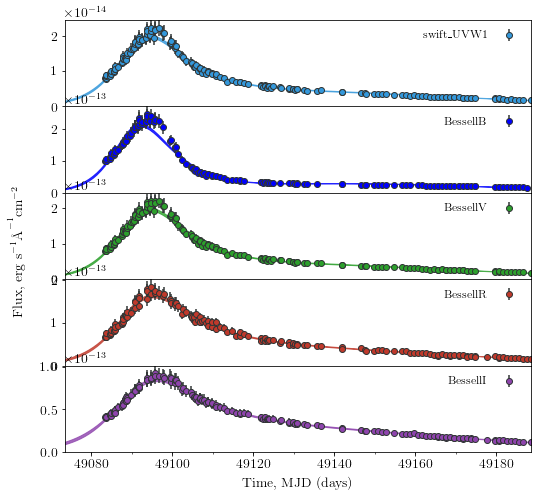

SN1994I


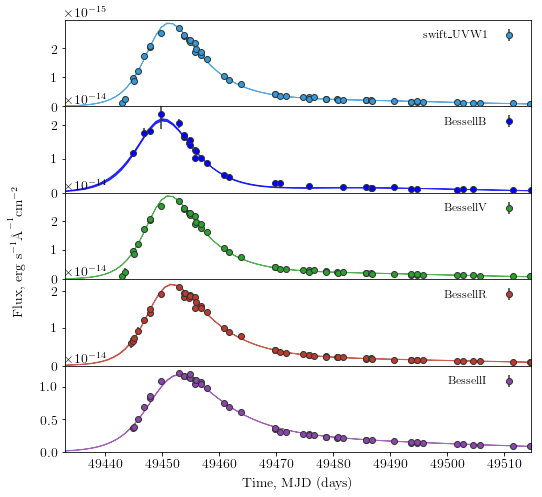

SN1996cb


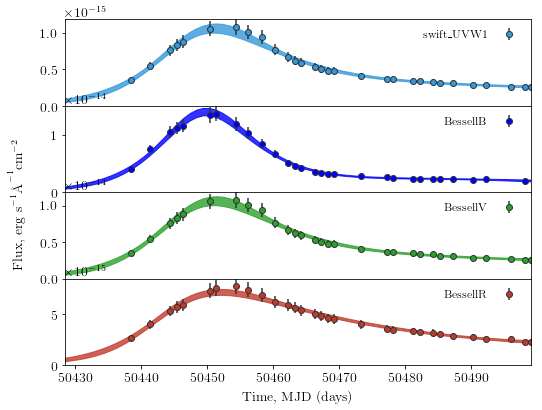

SN1998bw


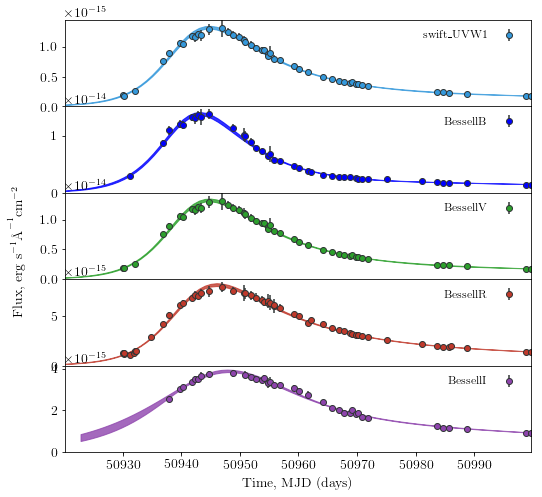

SN2002ap


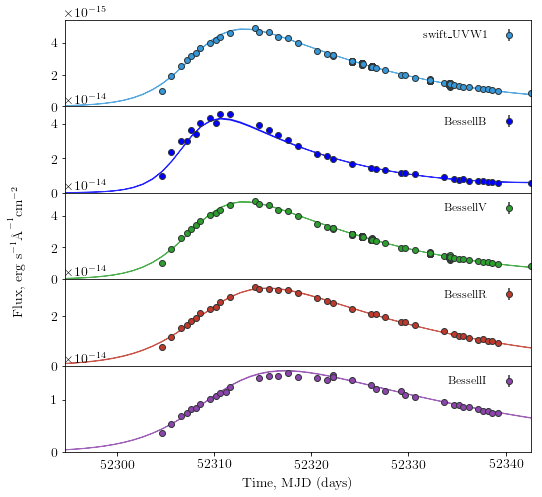

SN2003jd


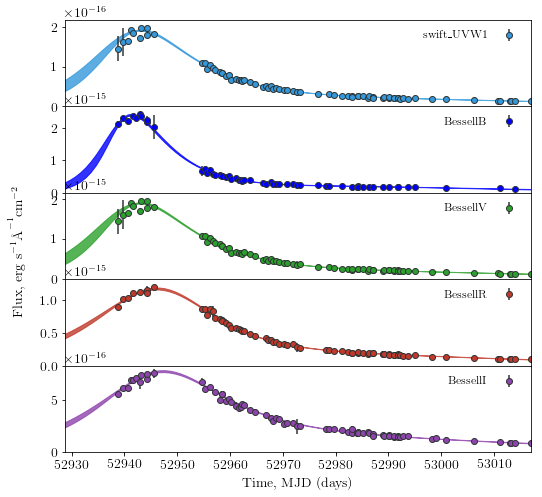

SN2005bf


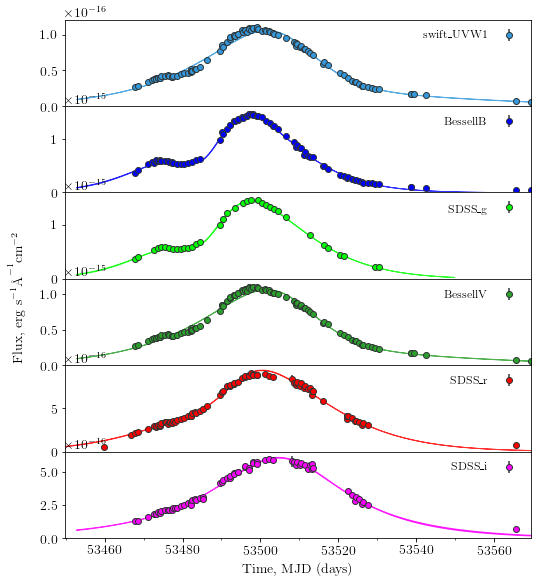

SN2005hg


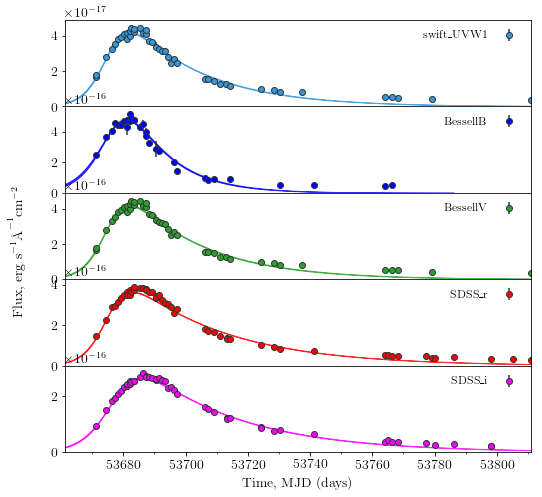

SN2006aj


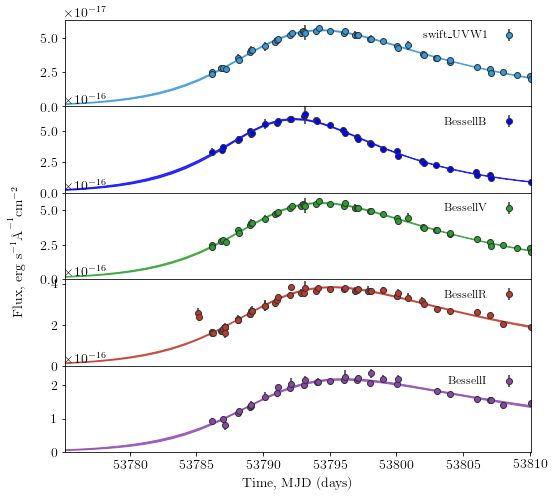

SN2007Y


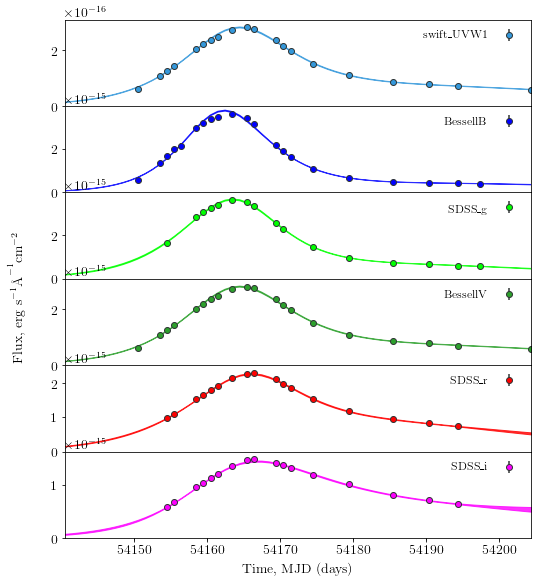

SN2007gr


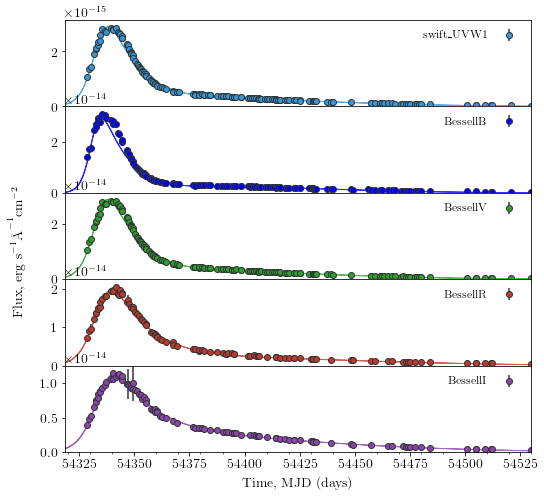

SN2007uy


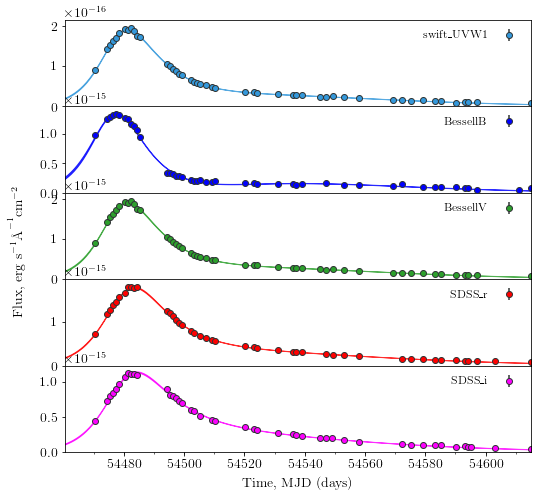

SN2008D


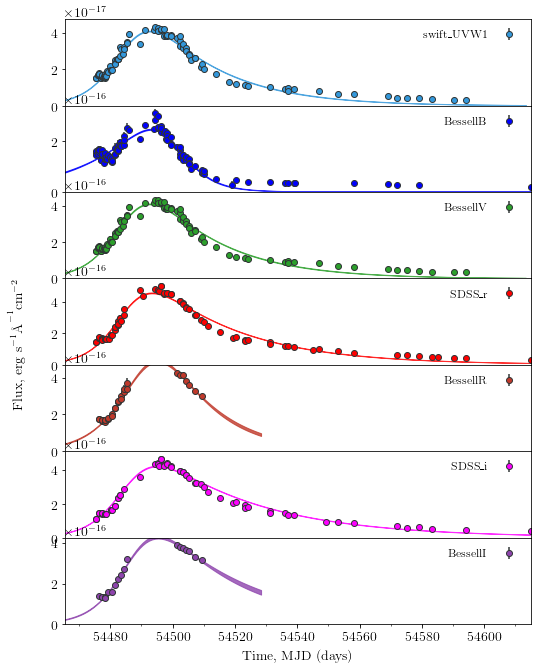

SN2008ax


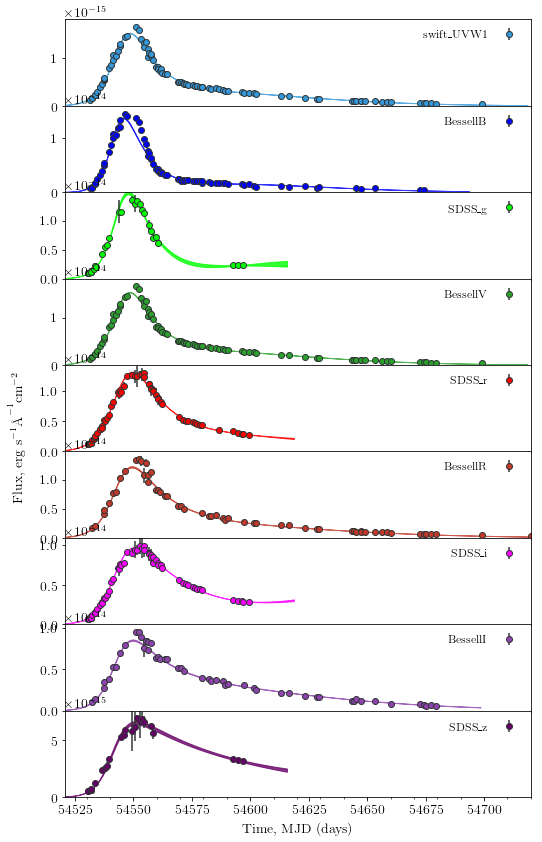

SN2008bo


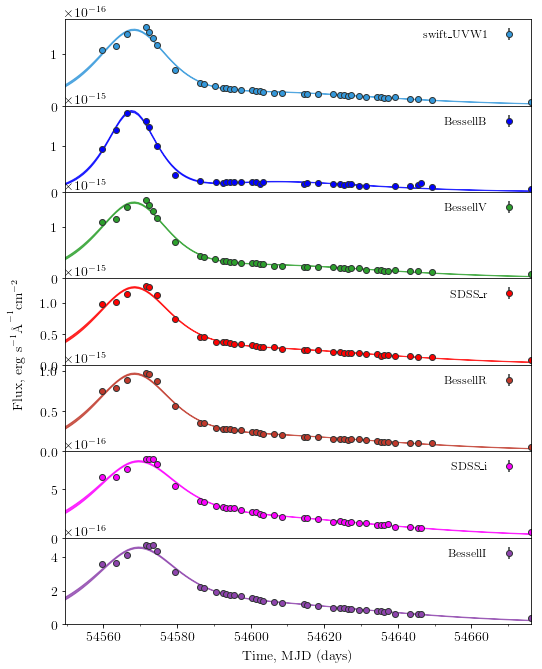

SN2009bb


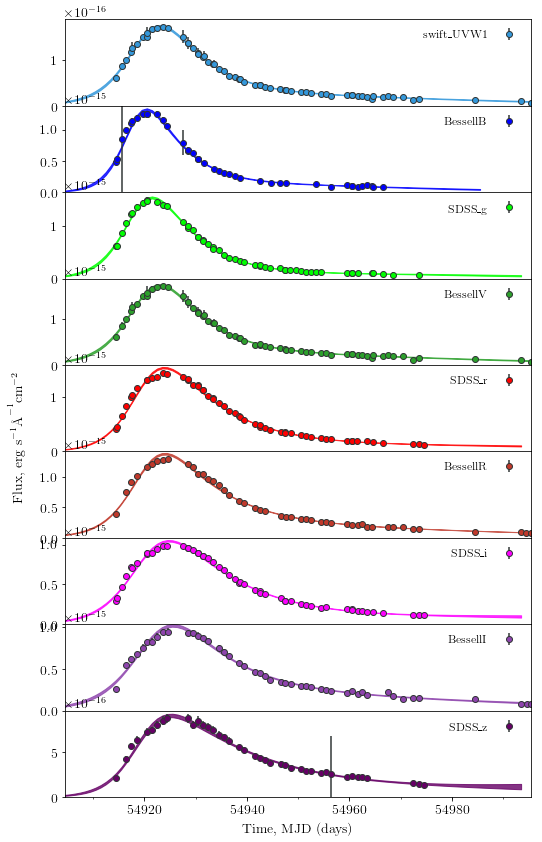

SN2009iz


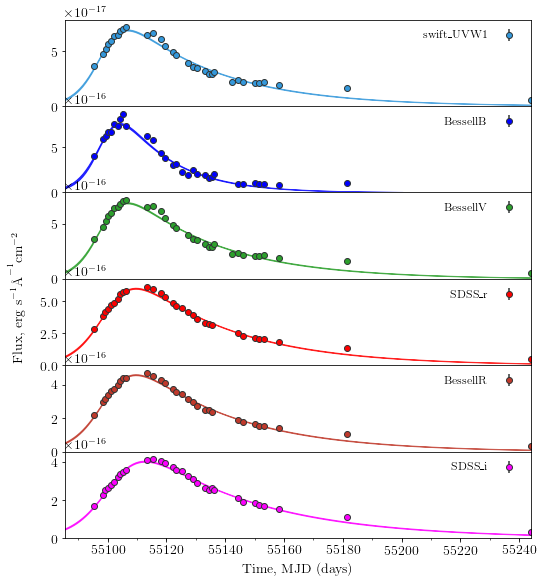

SN2009jf


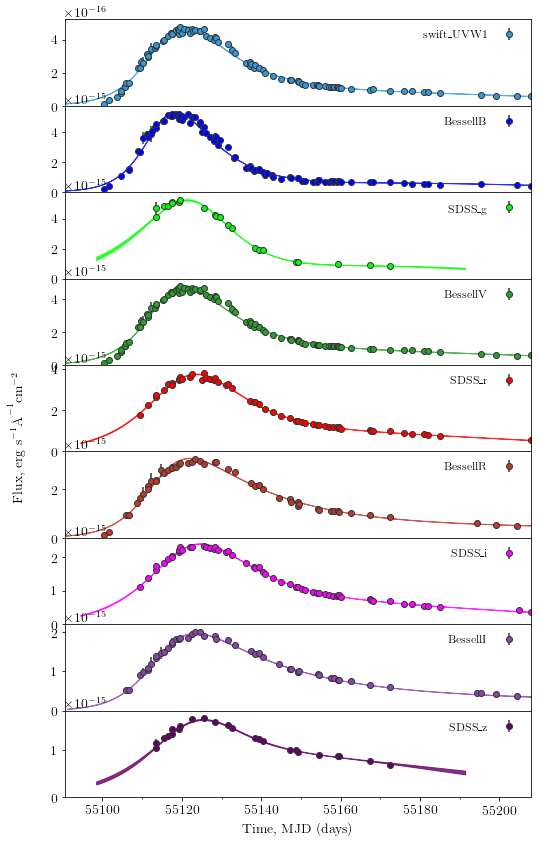

SN2010al


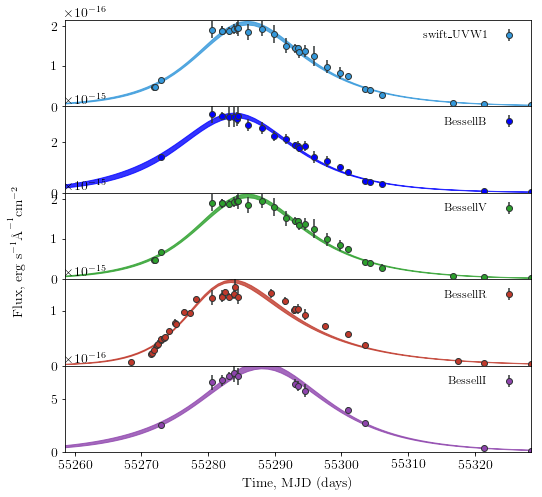

SN2011bm


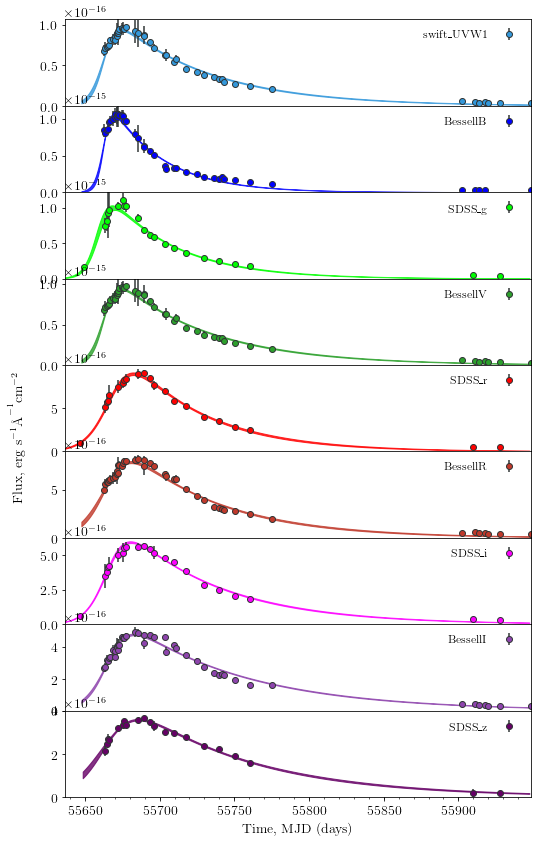

SN2011dh


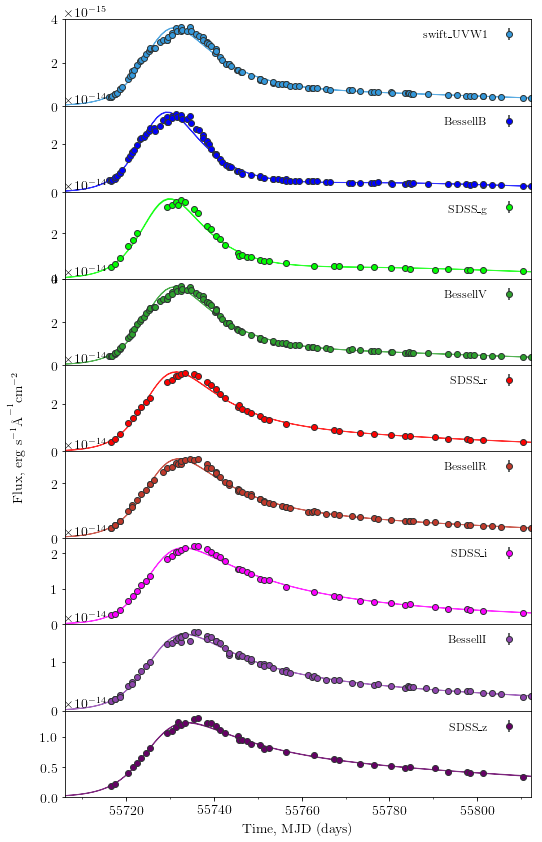

SN2011ei


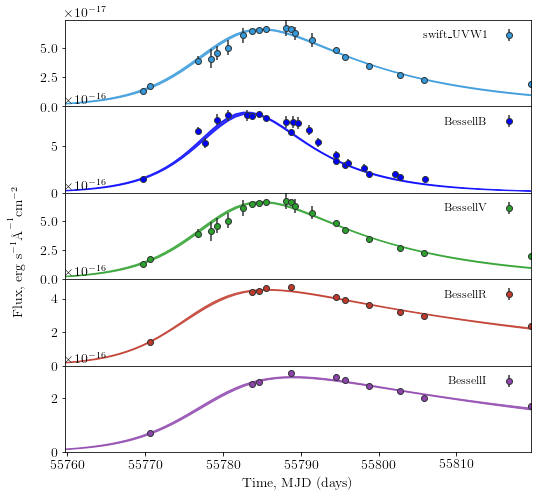

SN2012ap


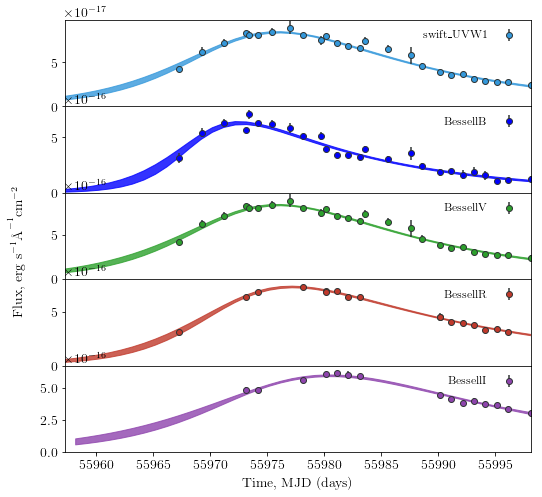

iPTF13bvn


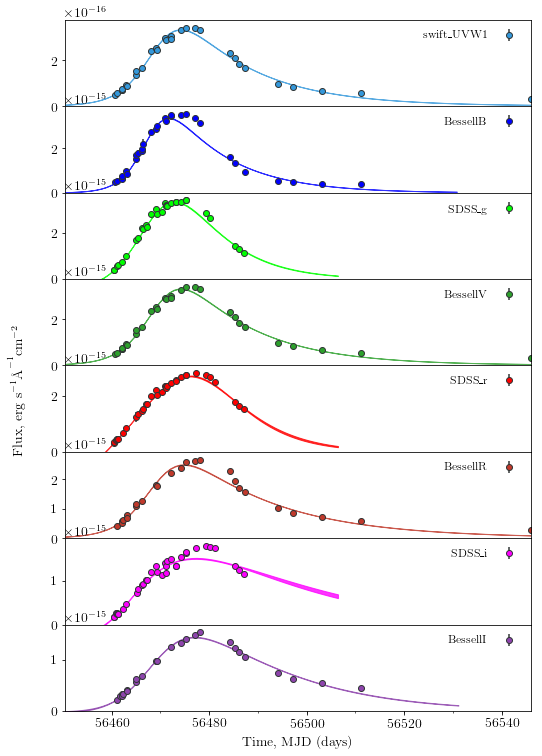

In [35]:
for index, row in df.iterrows():
    print(row['snname'])
    
    sn = pcc.classes.SNClass(row['snname'])
    sn.load_phot(verbose=False)
    
    path = pcc.defaults._default_recon_dir_path +  row['snname'] + ".dat"
    sn.get_lcfit(path)
    sn.plot_lc(multiplot=True)

### Run SpecFit

In [16]:
for index, row in df.iterrows():
    print(row['snname'])
    
    if row['rerun_spec']:
        sn = pcc.classes.SNClass(row['snname'])
        sn.load_phot(verbose=False)

        path = pcc.defaults._default_recon_dir_path +  row['snname'] + ".dat"
        sn.get_lcfit(path)

        pcc.coco.specfit_sn(SNobject=sn, overwrite=True, verbose=False)
        
    df.iloc[index, df.columns.get_loc('rerun_spec')] = False

SN1993J
['BessellB', 'BessellI', 'BessellR', 'BessellV', 'swift_UVW1']
Overwriting /Users/szymon/Projects/CoCo/recon/SN1993J_m.dat
Overwriting /Users/szymon/Projects/CoCo/recon/SN1993J_49084.000000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN1993J_49092.000000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN1993J_49095.000000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN1993J_49097.000000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN1993J_49098.000000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN1993J_49100.000000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN1993J_49111.000000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN1993J_49114.000000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN1993J_49123.000000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN1993J_49126.000000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN1993J_49130.000000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN1993J_49132.000000.spec
Overw

/Users/szymon/anaconda/lib/python3.5/site-packages/scipy/integrate/quadrature.py:324: RuntimeWarning: divide by zero encountered in true_divide
  h0divh1 = h0 / h1
/Users/szymon/anaconda/lib/python3.5/site-packages/scipy/integrate/quadrature.py:326: RuntimeWarning: divide by zero encountered in true_divide
  y[slice1]*hsum*hsum/hprod +
/Users/szymon/anaconda/lib/python3.5/site-packages/scipy/integrate/quadrature.py:326: RuntimeWarning: invalid value encountered in multiply
  y[slice1]*hsum*hsum/hprod +
/Users/szymon/anaconda/lib/python3.5/site-packages/scipy/integrate/quadrature.py:326: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum*hsum/hprod +
/Users/szymon/anaconda/lib/python3.5/site-packages/scipy/integrate/quadrature.py:327: RuntimeWarning: invalid value encountered in multiply
  y[slice2]*(2-h0divh1))
/Users/szymon/anaconda/lib/python3.5/site-packages/scipy/integrate/quadrature.py:326: RuntimeWarning: invalid value encountered in add
  y[slice1]*hsum*hs

Overwriting /Users/szymon/Projects/CoCo/recon/SN2007Y_54169.980000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN2007Y_54172.960000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN2007Y_54177.940000.spec
SN2007gr
['BessellB', 'BessellI', 'BessellR', 'BessellV', 'swift_UVW1']
Overwriting /Users/szymon/Projects/CoCo/recon/SN2007gr_m.dat
Overwriting /Users/szymon/Projects/CoCo/recon/SN2007gr_54329.020000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN2007gr_54330.020000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN2007gr_54332.010000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN2007gr_54333.010000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN2007gr_54334.010000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN2007gr_54335.010000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN2007gr_54338.000000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN2007gr_54342.990000.spec
Overwriting /Users/szymon/Projects/CoCo/recon/SN2007gr_54344.990000

SN1993J


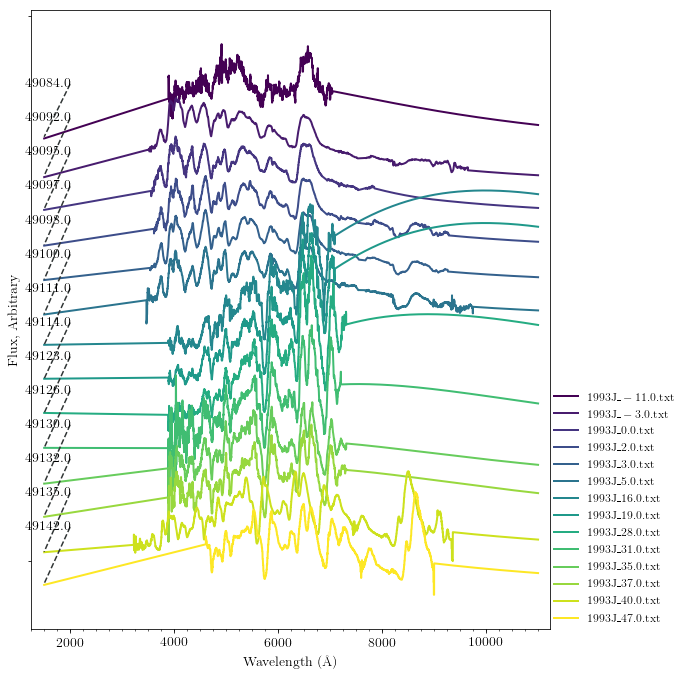

SN1994I


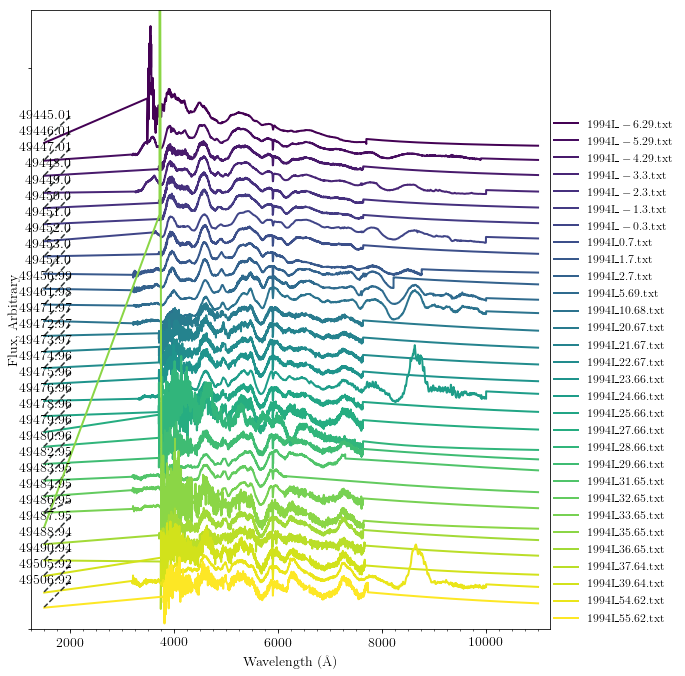

SN1996cb


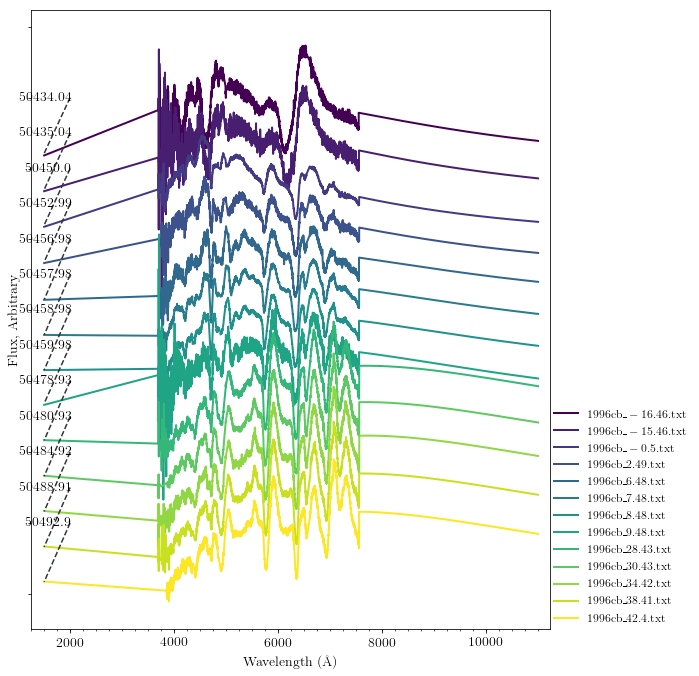

SN1998bw


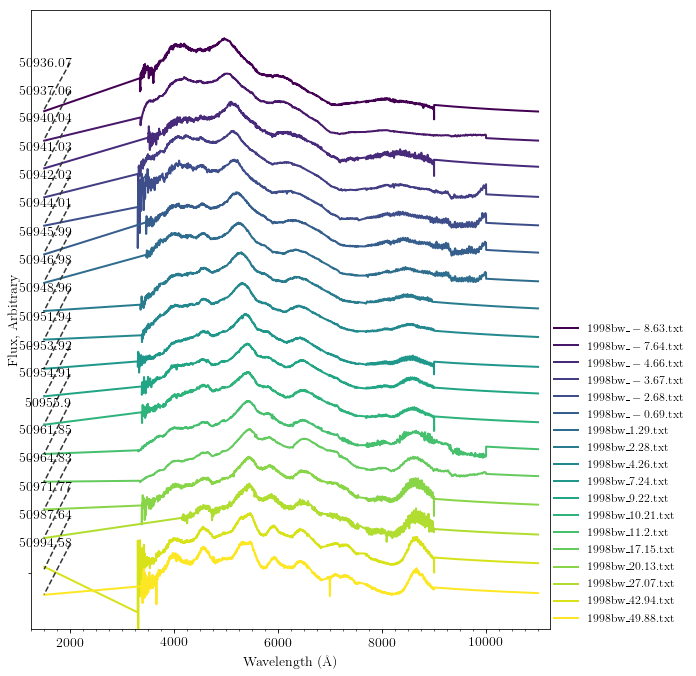

SN2002ap


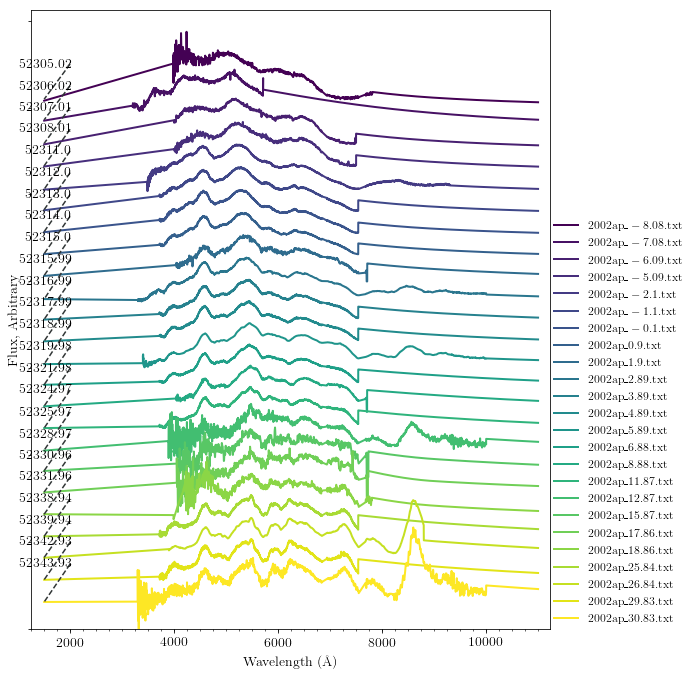

SN2003jd


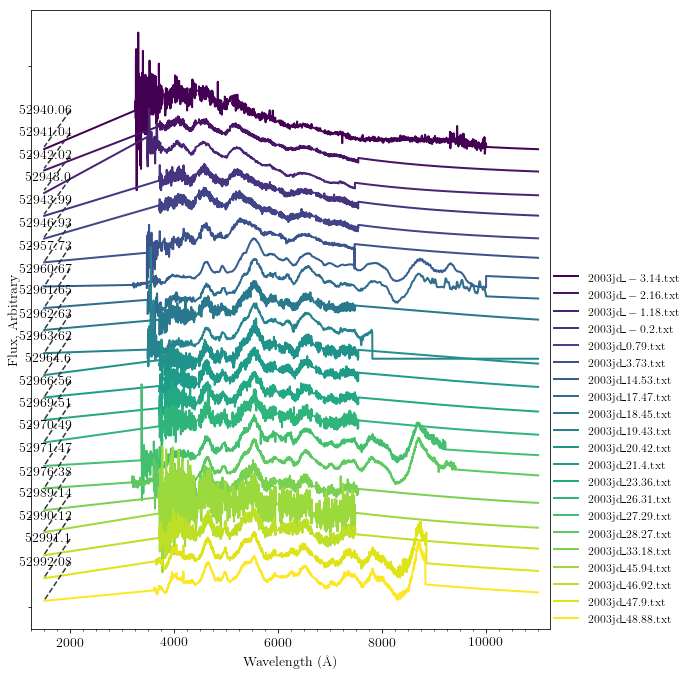

SN2005bf


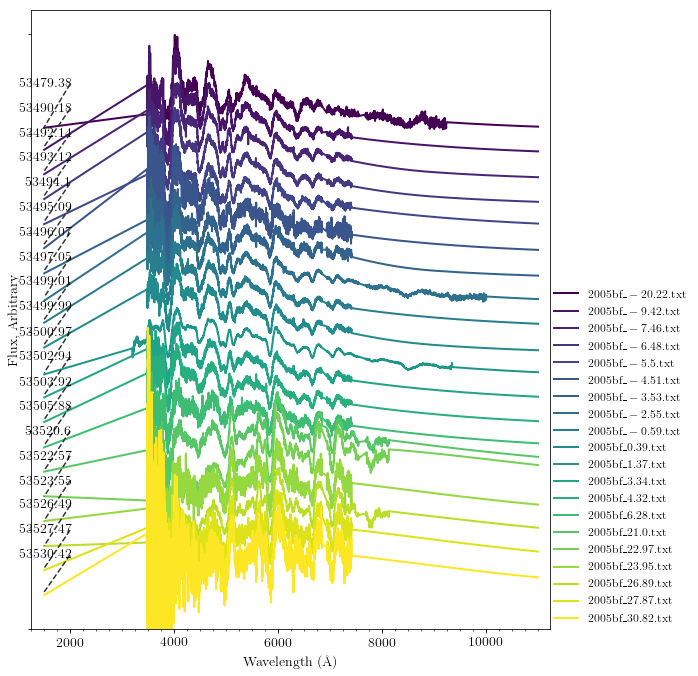

SN2005hg


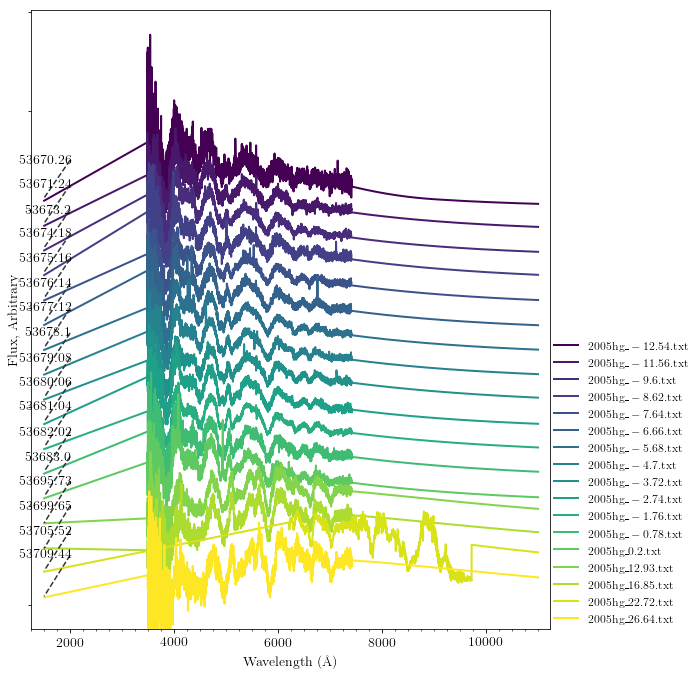

SN2006aj


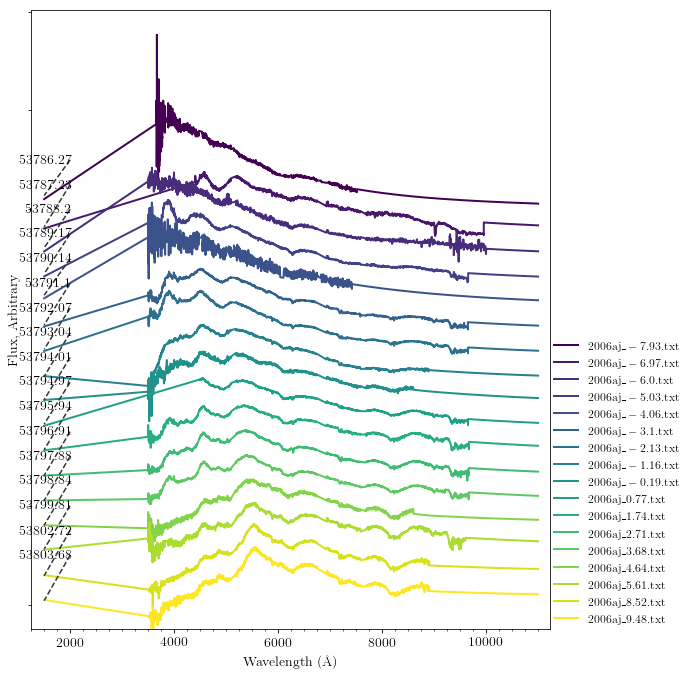

SN2007Y


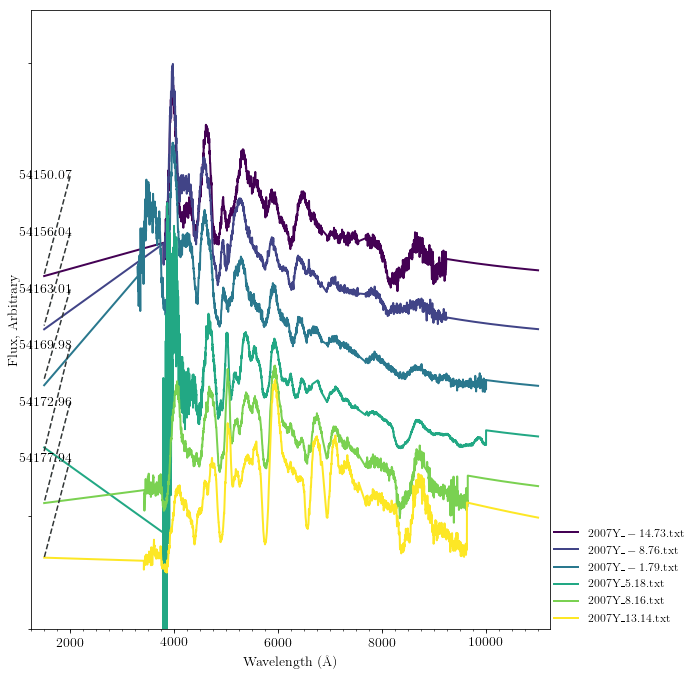

SN2007gr


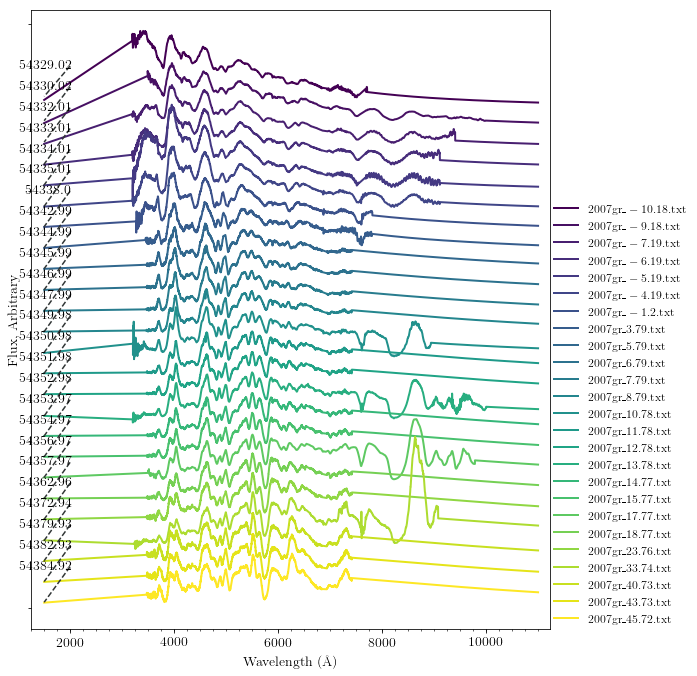

SN2007uy


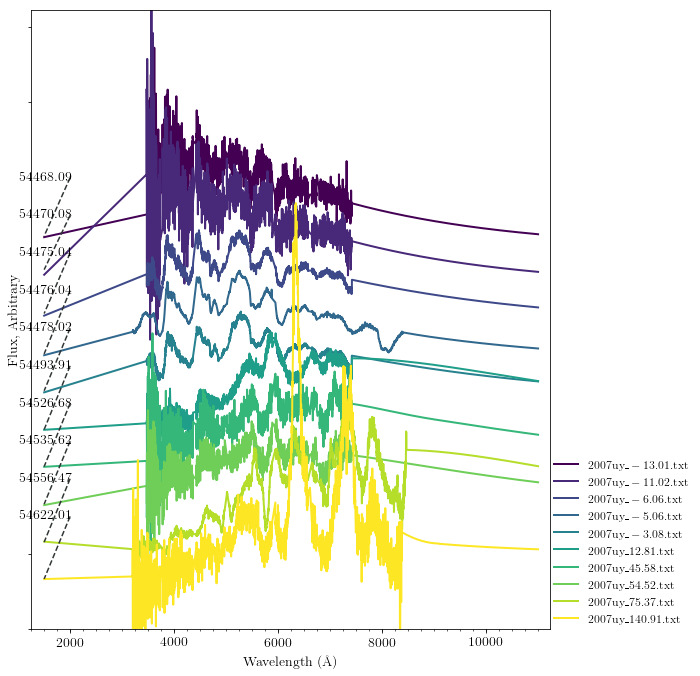

SN2008D


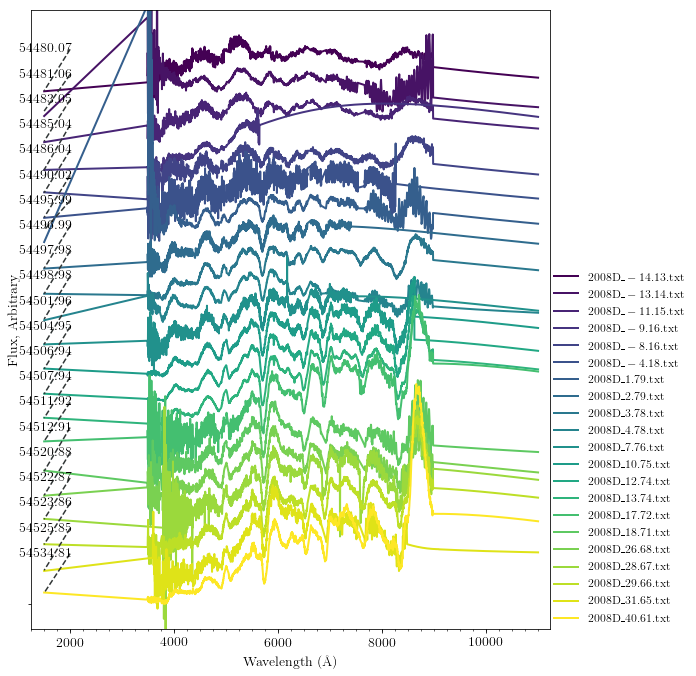

SN2008ax


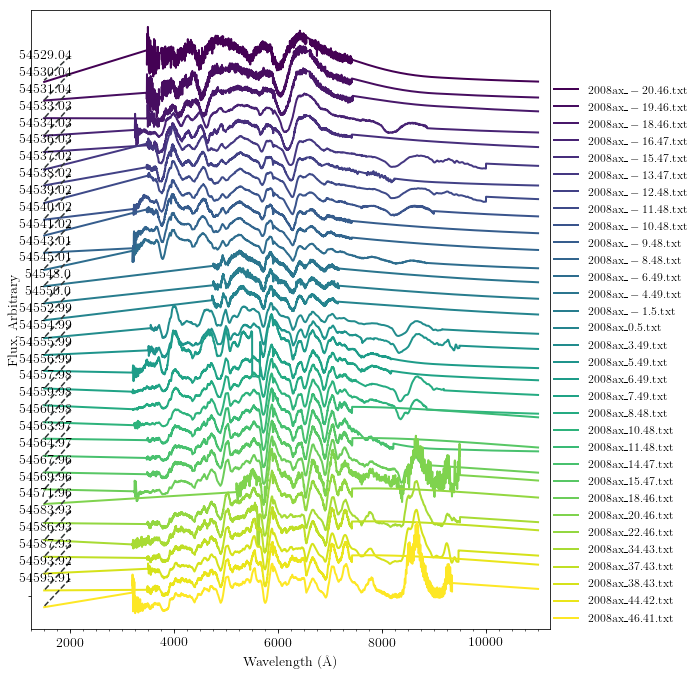

SN2008bo


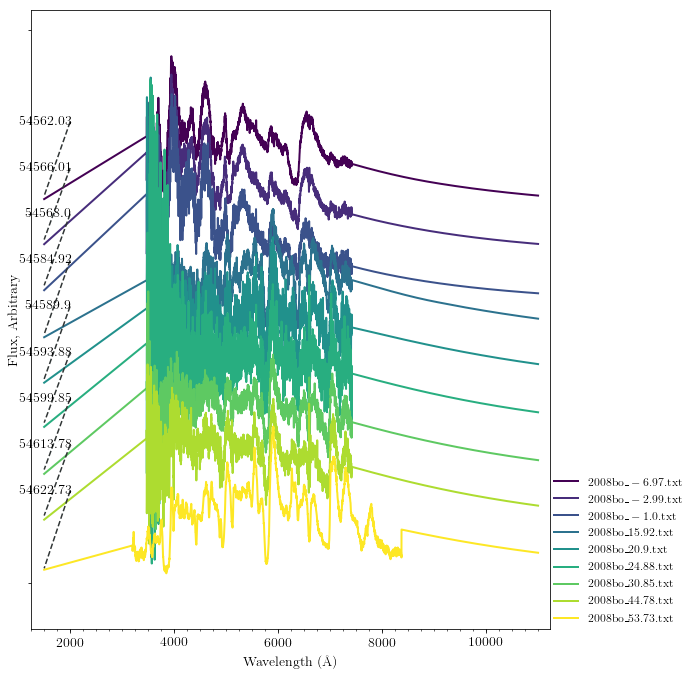

SN2009bb


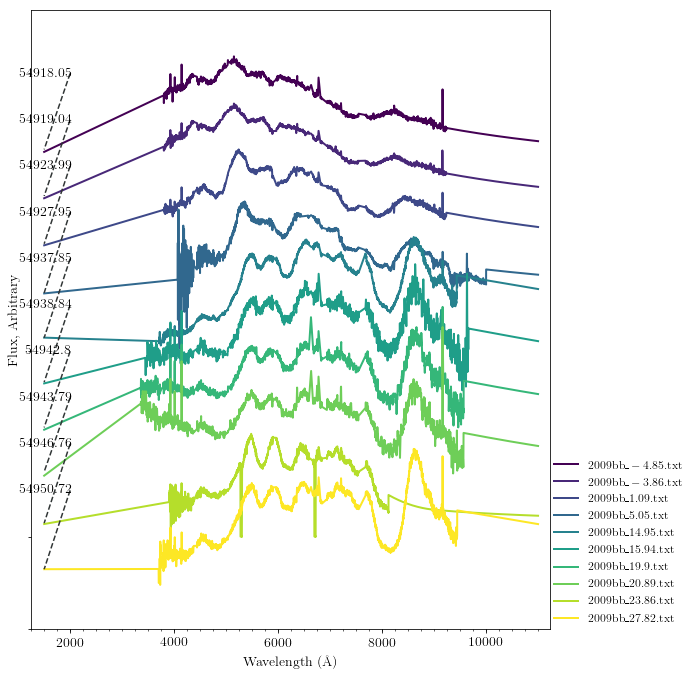

SN2009iz


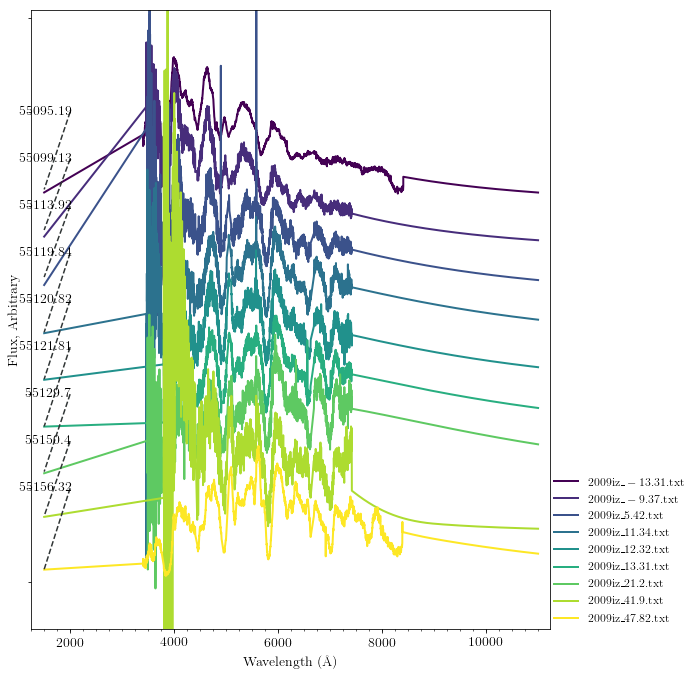

SN2009jf


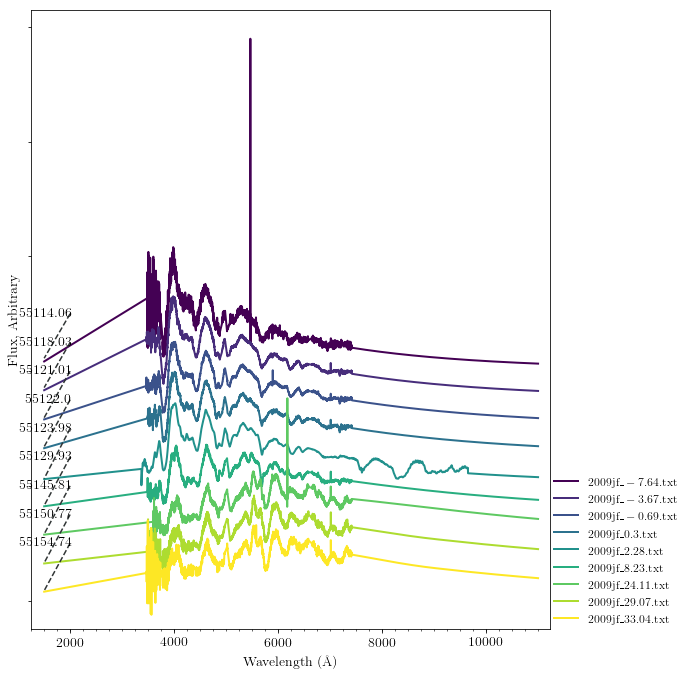

SN2010al


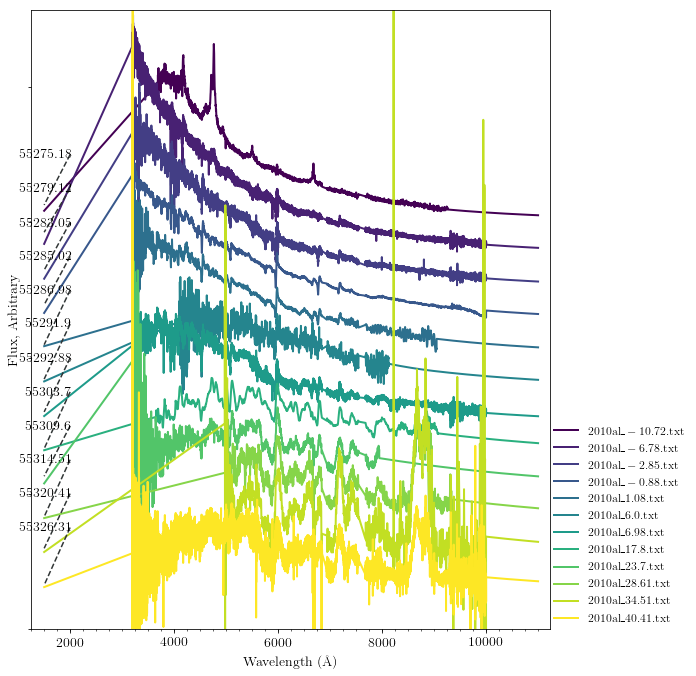

SN2011bm


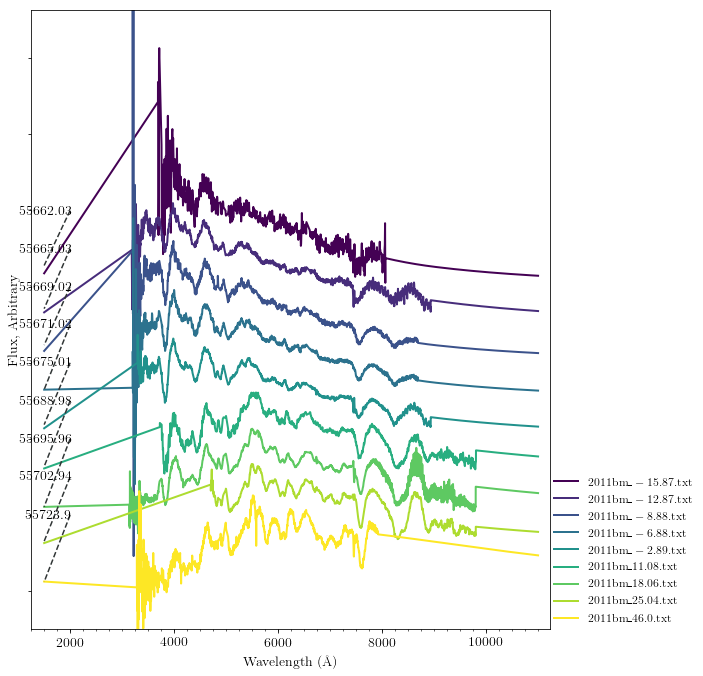

SN2011dh


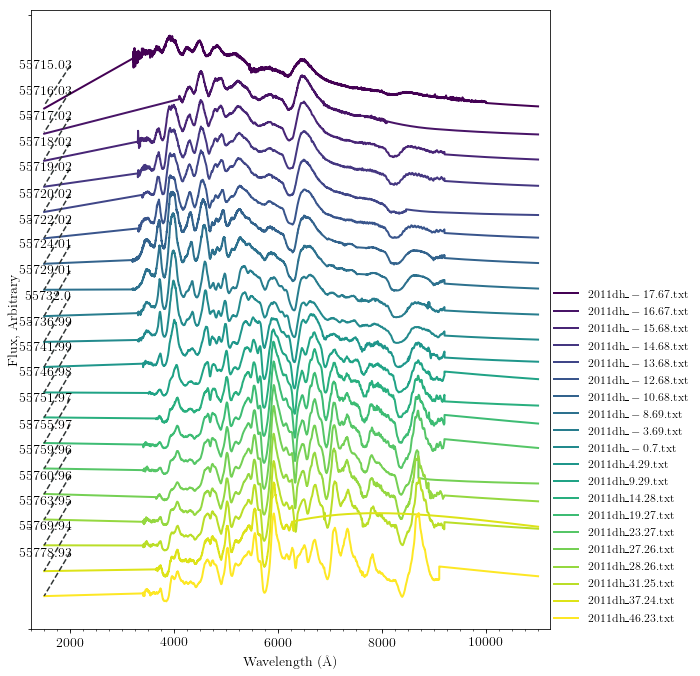

SN2011ei


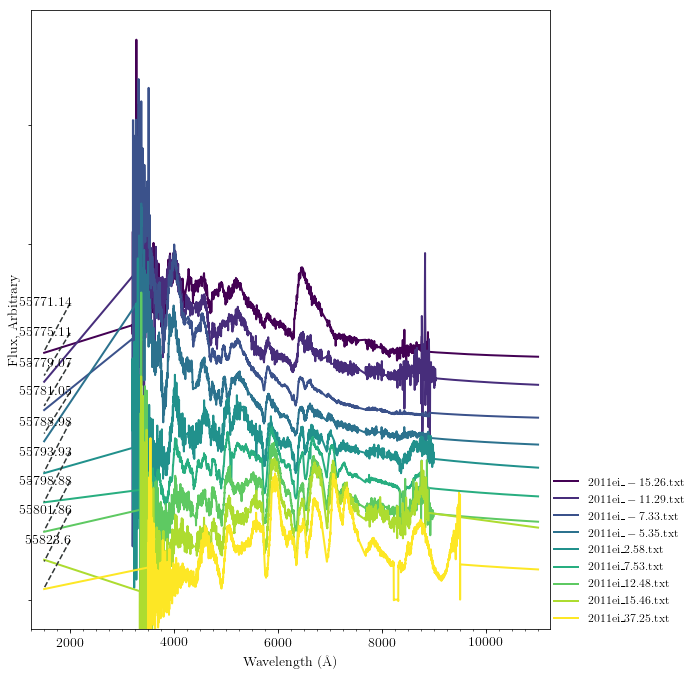

SN2012ap


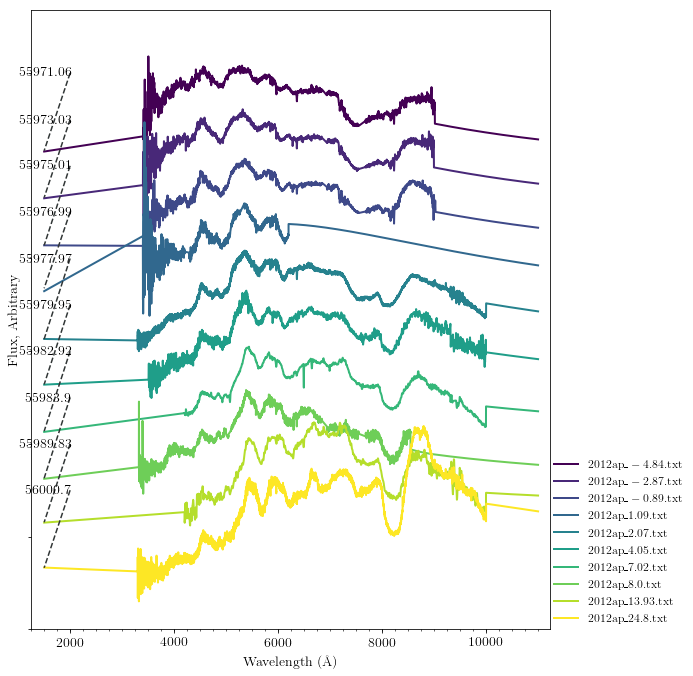

iPTF13bvn


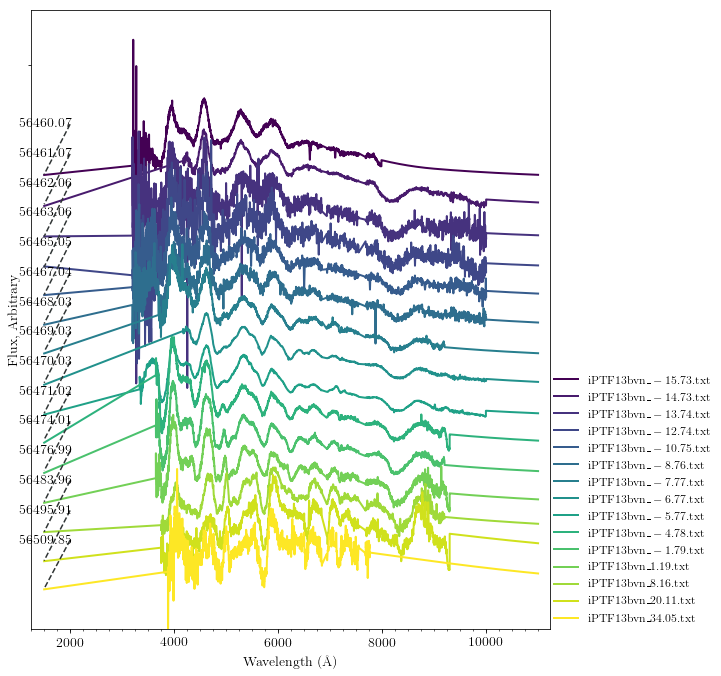

In [15]:
for index, row in df.iterrows():
    print(row['snname'])
    
    sn = pcc.classes.SNClass(row['snname'])
    sn.load_phot(verbose=False)
#     sn.get_lcfit(verbose=False)

    list_file_path = "/Users/szymon/Projects/CoCo/lists/" + row['snname'] + ".list"
    sn.load_list(path=list_file_path)
    sn.load_spec(verbose=False)

    sn.plot_spec()

SN1993J


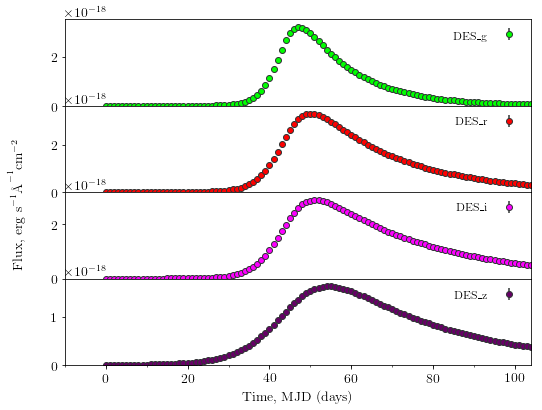

SN1994I


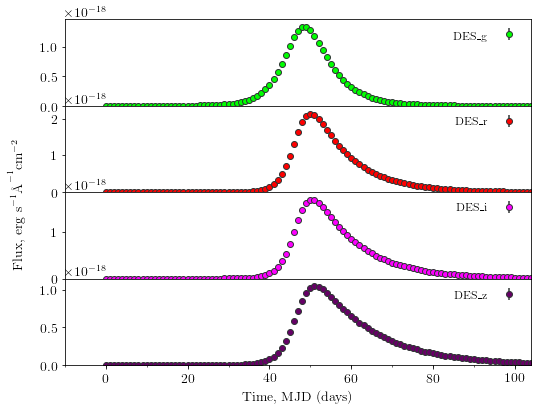

SN1996cb


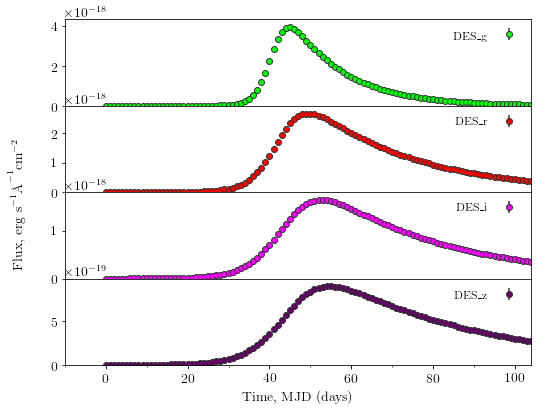

SN1998bw


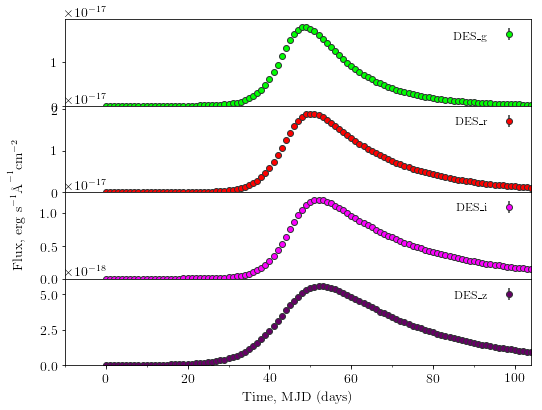

SN2002ap


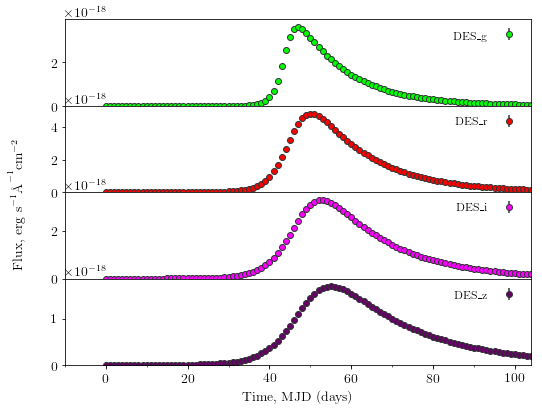

SN2003jd


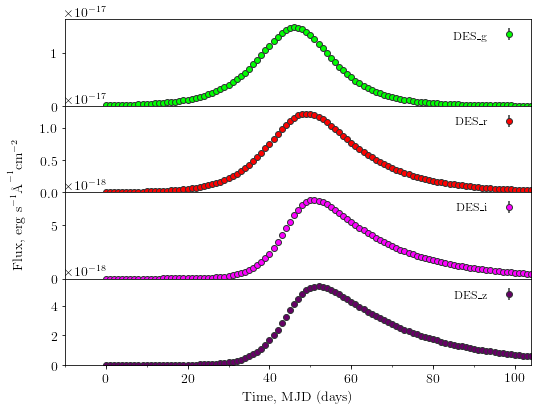

SN2005bf


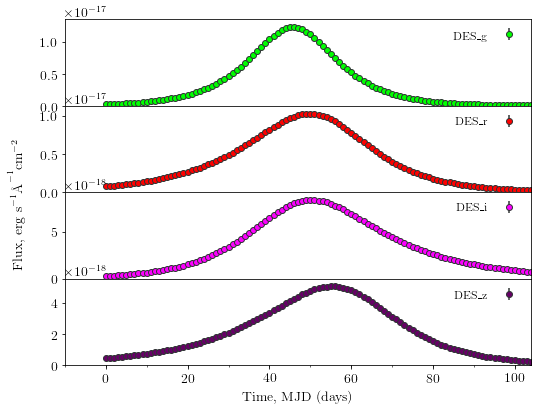

SN2005hg


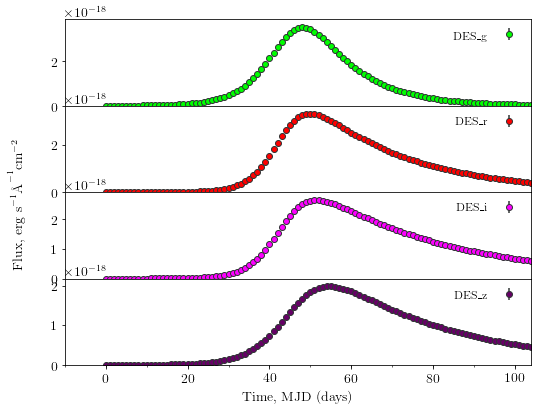

SN2006aj


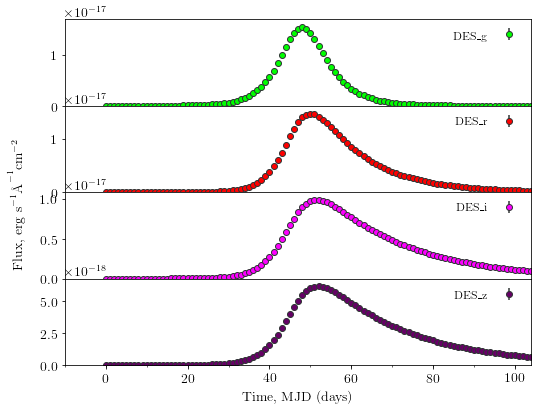

SN2007Y


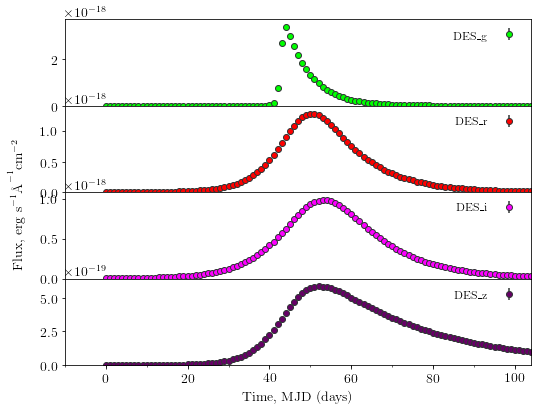

SN2007gr


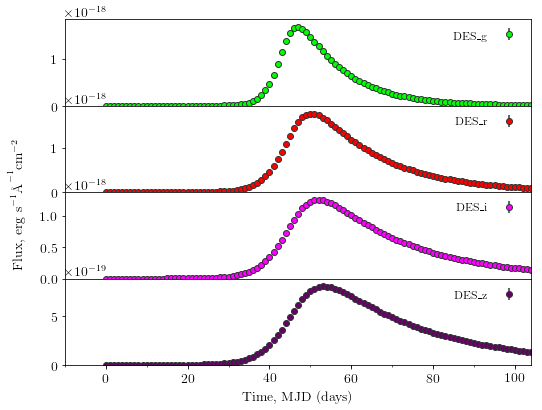

SN2007uy


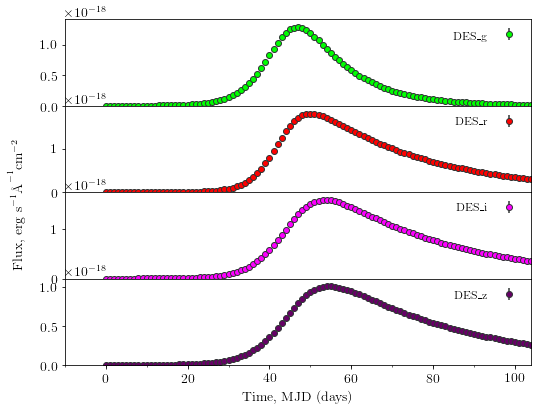

SN2008D


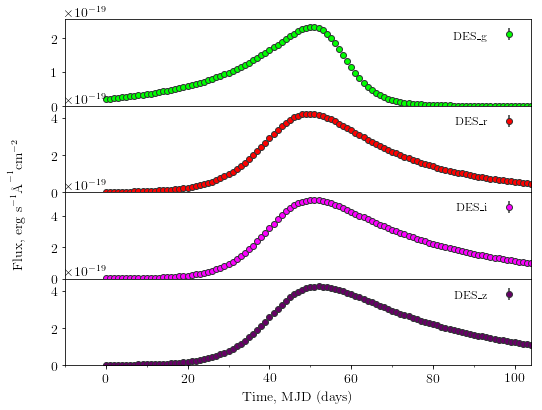

SN2008ax


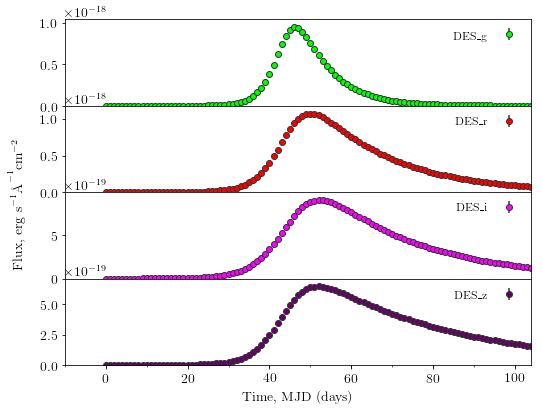

SN2008bo


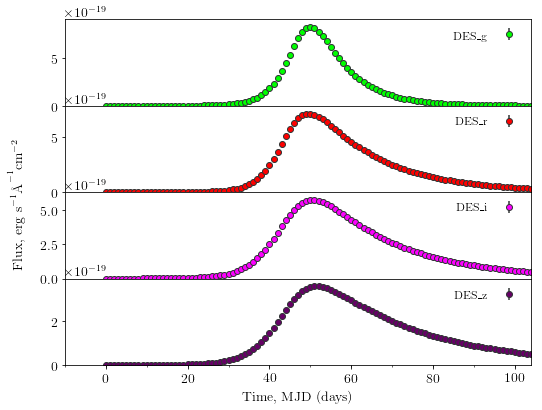

SN2009bb


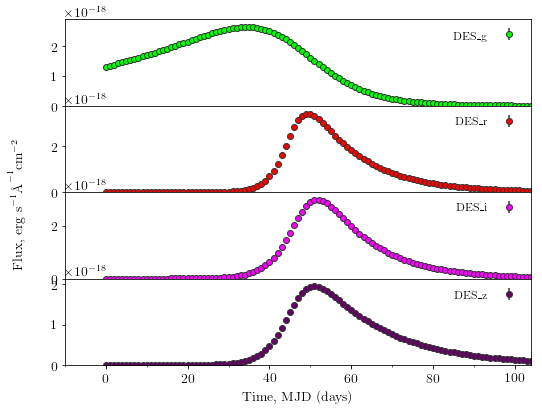

SN2009iz


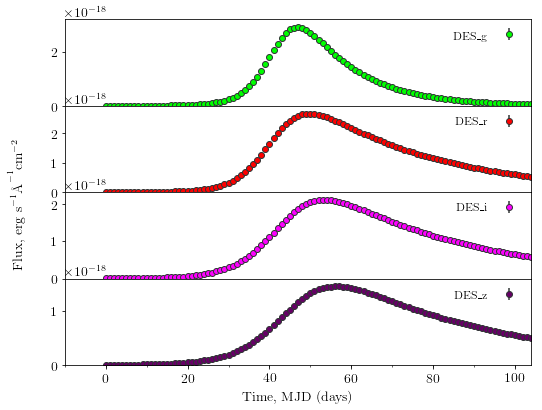

SN2009jf


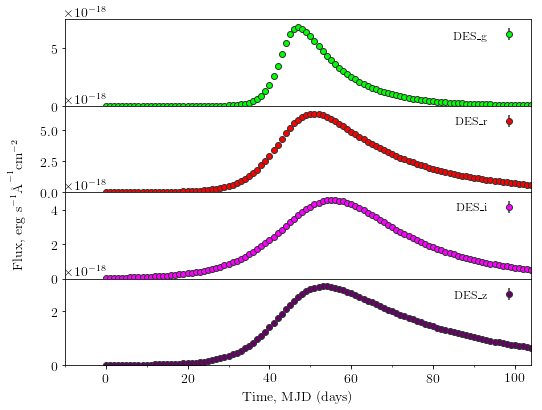

SN2010al


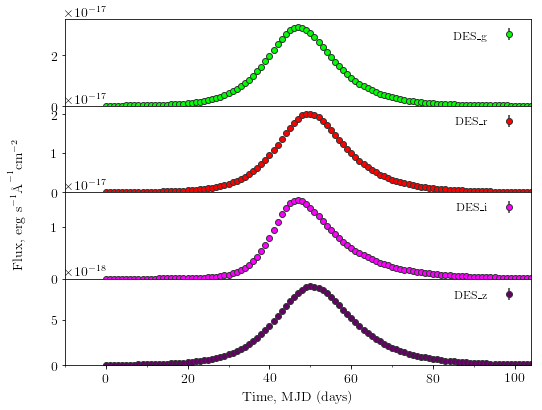

SN2011bm


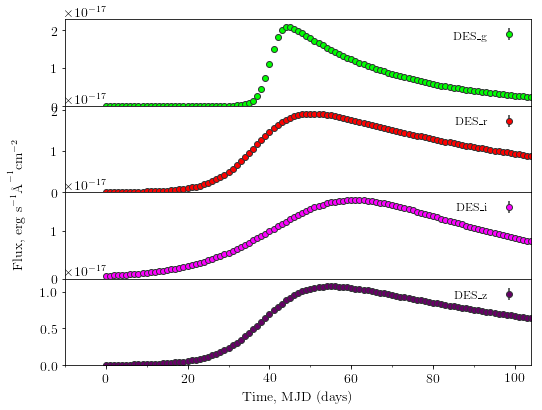

SN2011dh


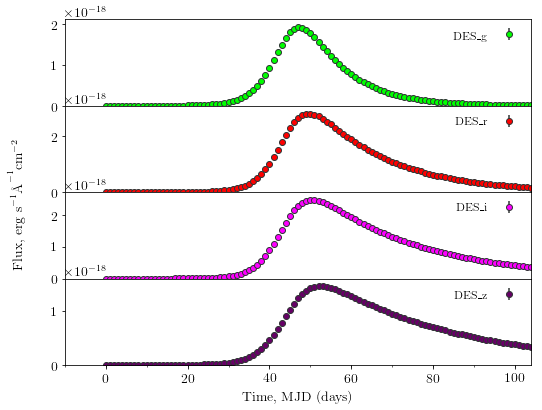

SN2011ei


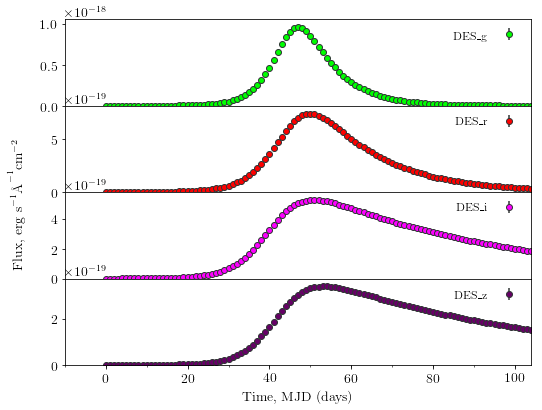

SN2012ap


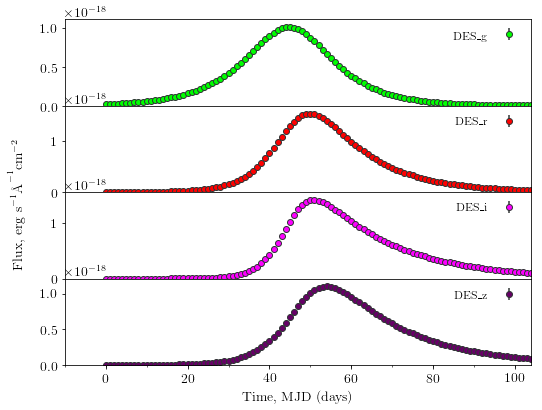

iPTF13bvn


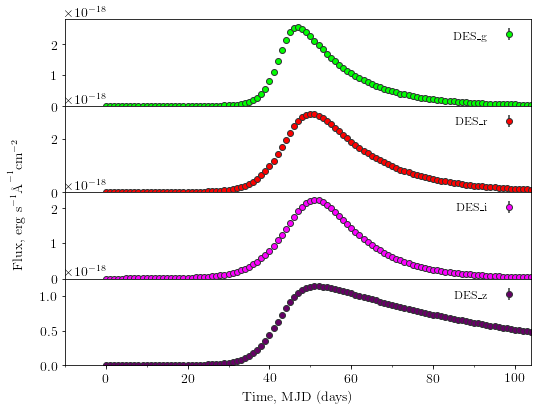

In [7]:
mjdmax = 50                    
absmag_offset = 0.0
EBV_MW = 0.0
EBV_host = 0.0
R_v = 3.1
    
for index, row in df.iterrows():
    print(row['snname'])
    snname = row['snname']            
    
    z_sim = info.get_sn_info(snname)["z_distmod"]
    z_sim = 0.2
    mjd_obs = np.arange(0.,105.,1.)
    filters = ["DES_g", "DES_r", "DES_i", "DES_z"]
    
    ap_t = None
    for flt in filters:
        filter_obs = np.array([pcc.utils.b(flt) for observation in mjd_obs])
    
        flux, flux_err = coco.simulate(pcc.utils.b(snname),
                                       z_sim, 
                                       absmag_offset, 
                                       EBV_MW, EBV_host, R_v,
                                       mjdmax, mjd_obs,
                                       filter_obs)
        if ap_t is None:
            ap_t = pcc.utils.simulate_out_to_ap_table(mjd_obs, flux, flux_err, filter_obs)  
        else:
            ap_t = vstack([ap_t, pcc.utils.simulate_out_to_ap_table(mjd_obs, flux, flux_err, filter_obs)])
            
    sn_sim = pcc.classes.SNClass(snname)
    sn_sim.load_phot(phot_table=ap_t)

    sn_sim.plot_lc(multiplot=True)